In [1]:
library('readr')
library('magrittr')
library('dplyr')
library('tidyr')
library('ggplot2')


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching package: ‘tidyr’

The following object is masked from ‘package:magrittr’:

    extract



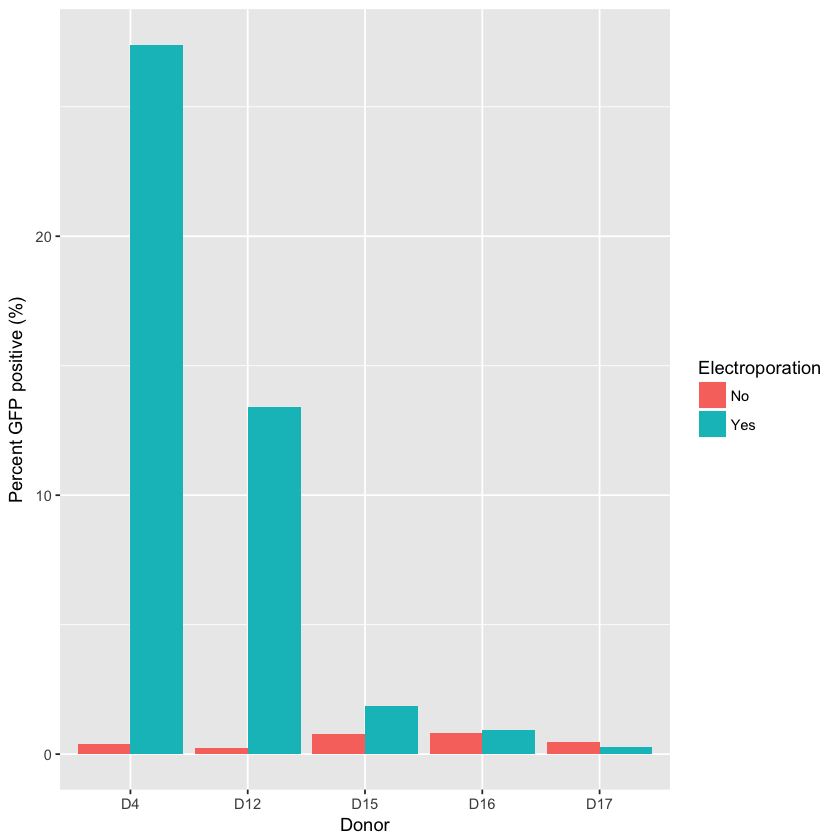

In [20]:
read_tsv(
    'donor-difference/unactivated-flow.tsv',
    col_types=cols(
        `Sample:`=col_character(),
        `Electroporation`=col_factor(levels=c('No', 'Yes')),
        `Donor`=col_factor(levels=c('D4', 'D12', 'D15', 'D16', 'D17')),
        .default=col_double()
    )
) %>%
ggplot(aes(x=`Donor`, y=`Live/GFP+ | Freq. of Parent`, fill=`Electroporation`) ) +
    geom_col(position="dodge") +
    ylab('Percent GFP positive (%)')

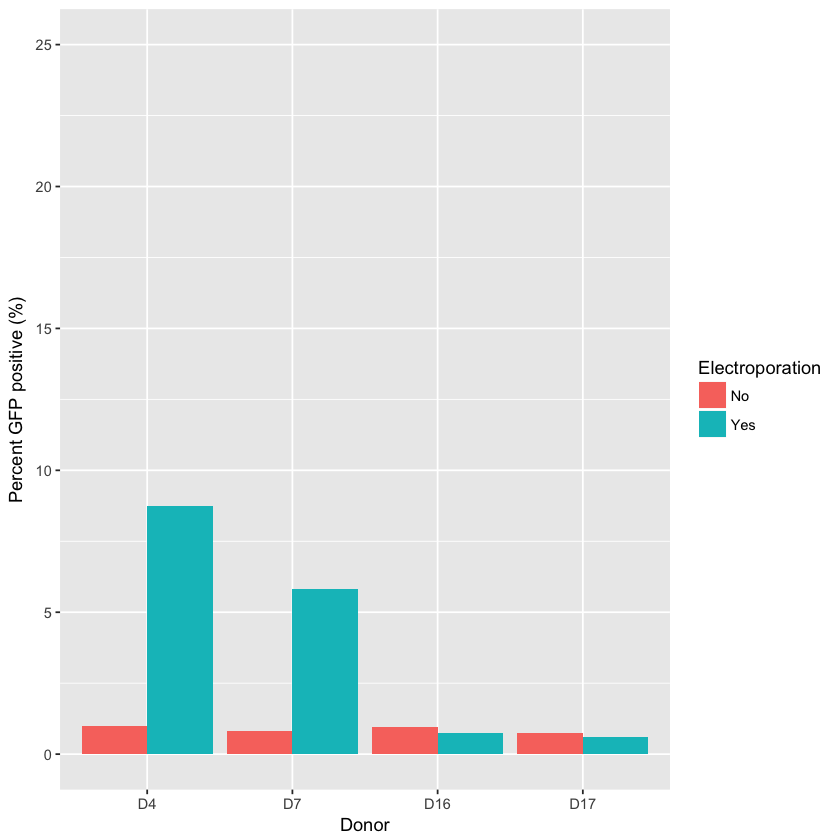

In [21]:
read_tsv(
    'donor-difference/unactivated-flow2.tsv',
    col_types=cols(
        `Sample:`=col_character(),
        `Electroporation`=col_factor(levels=c('No', 'Yes')),
        `Donor`=col_factor(levels=c('D4', 'D7', 'D16', 'D17')),
        .default=col_double()
    )
) %>%
ggplot(aes(x=`Donor`, y=`Live/GFP+ | Freq. of Parent`, fill=`Electroporation`) ) +
    geom_col(position="dodge") +
    ylab('Percent GFP positive (%)') +
    ylim(0, 25)

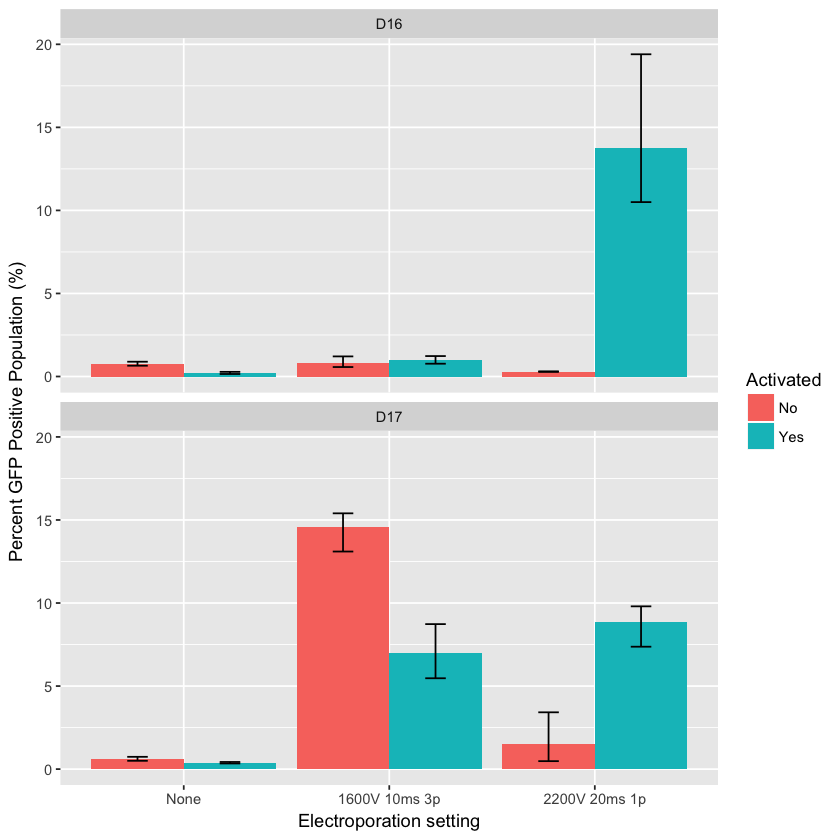

In [25]:
read_tsv(
    'donor-difference/act_vs_unac-flow.tsv',
    col_types=cols(
        `Sample:`=col_character(),
        `Donor`=col_factor(levels=c('D16', 'D17')),
        `Activated`=col_factor(levels=c('No', 'Yes')),
        `Replicate`=col_factor(levels=c('1', '2', '3')),
        `Electroporation`=col_factor(levels=c('None', '1600V 10ms 3p', '2200V 20ms 1p'))
    )
) %>%
filter(`Live | Freq. of Parent` > 1) %>%
group_by(`Donor`, `Activated`, `Electroporation`) %>%
summarize(
    `GFP+_mean`=mean(`Live/GFP+ | Freq. of Parent`),
    `GFP+_min`=min(`Live/GFP+ | Freq. of Parent`),
    `GFP+_max`=max(`Live/GFP+ | Freq. of Parent`)
) %>%
ggplot(aes(x=`Electroporation`, y=`GFP+_mean`, fill=`Activated`)) +
    geom_col(position="dodge") +
    geom_errorbar(
       aes(ymin=`GFP+_min`, ymax=`GFP+_max`),
        width=0.2,
        position=position_dodge(0.9)
    ) +
    facet_wrap(~`Donor`, ncol=1) +
    xlab('Electroporation setting') +
    ylab('Percent GFP Positive Population (%)')

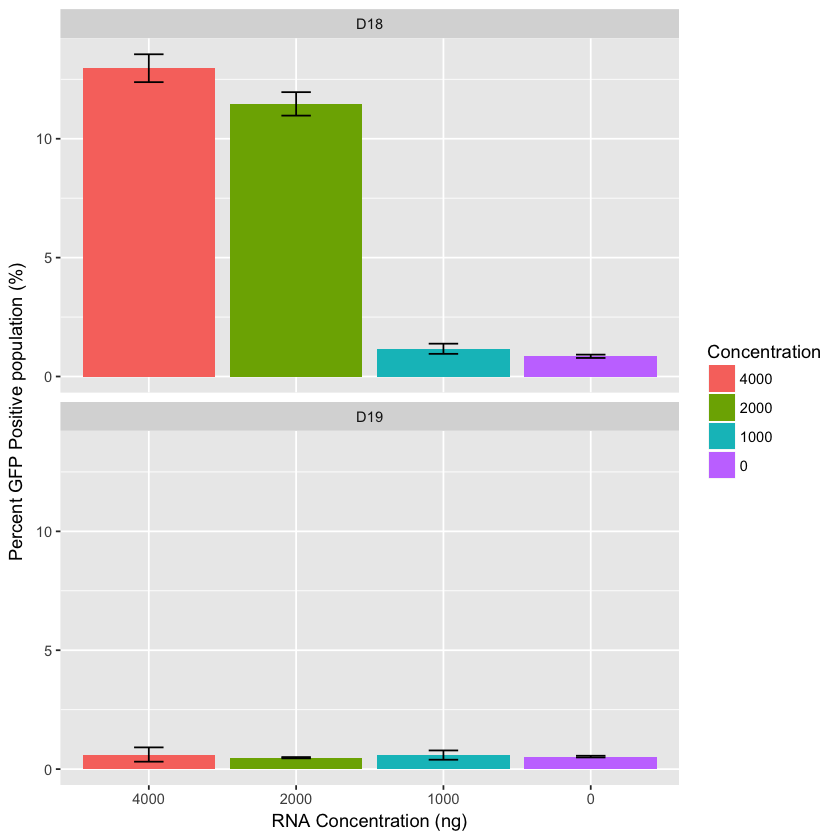

In [29]:
read_tsv(
    'donor-difference/gfp-titration.tsv',
    col_types=cols(
      `Sample:` = col_character(),
      `Donor`=col_factor(levels=c('D18', 'D19')),
      `Concentration`=col_factor(levels=c('4000', '2000', '1000', '0')),
      `Replicate`=col_factor(levels=c('1', '2', '3')),
      .default=col_number()
    )
) %>%
group_by(`Donor`, `Concentration`) %>%
summarize(
    `GFP_Pos_Mean`=mean(`Unactivated live/GFP+ | Freq. of Parent`),
    `GFP_Pos_Sd`=sd(`Unactivated live/GFP+ | Freq. of Parent`)
) %>%
ggplot(aes(x=`Concentration`, y=`GFP_Pos_Mean`, fill=`Concentration`)) +
    geom_col() +
    geom_errorbar(
        aes(ymin=`GFP_Pos_Mean`-`GFP_Pos_Sd`, ymax=`GFP_Pos_Mean`+`GFP_Pos_Sd`),
        width=.2
    ) +
    facet_wrap(~`Donor`, ncol=1) +
    xlab('RNA Concentration (ng)') +
    ylab('Percent GFP Positive population (%)')
    